In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data preprocessing

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
data = pd.read_csv('data/tested.csv')
data = data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])
missing_columns = data.columns[data.isnull().any()]
imp = SimpleImputer(strategy='mean')
data[missing_columns] = imp.fit_transform(data[missing_columns])
data = pd.get_dummies(data)
x = data.drop(columns=['Survived'])
y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## Training models


## K-NN classifier
find the best 'k'

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

rng = range(1, 31)
cv_scores = []

for k in rng:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = rng[np.argmax(cv_scores)]
worst_k = rng[np.argmin(cv_scores)]
print(f'Best k:{best_k}')
print(f'Worst k:{worst_k}')

Best k:1
Worst k:20


### K-NN evaluation of model

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f'-----Metrics for Best K: {best_k}-----')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

knn = KNeighborsClassifier(n_neighbors=worst_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f'-----Metrics for Worst K: {worst_k}-----')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

-----Metrics for Best K: 1-----
Accuracy: 0.6904761904761905
Precision: 0.6176470588235294
Recall: 0.6176470588235294
F1 Score: 0.6176470588235294
Confusion Matrix: [[37 13]
 [13 21]]
-----Metrics for Worst K: 20-----
Accuracy: 0.6190476190476191
Precision: 0.6
Recall: 0.17647058823529413
F1 Score: 0.2727272727272727
Confusion Matrix: [[46  4]
 [28  6]]


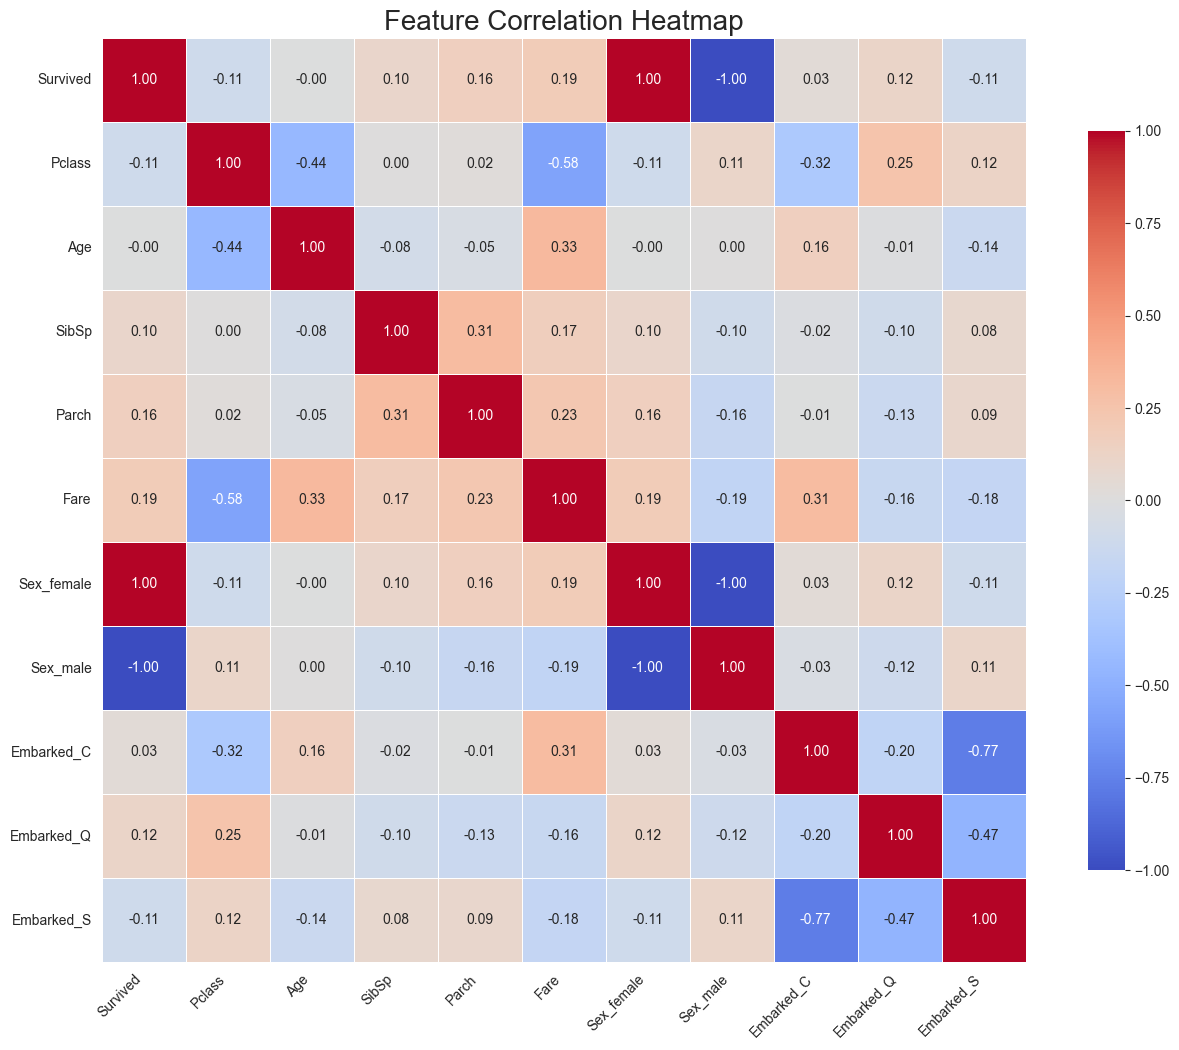

In [6]:
corr = data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': .8})
plt.title('Feature Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()